In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import neighbors
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split as tts

# Data

In [3]:
# Original dataset
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

# Model 1: Scaled Predictor Variables
Model parameters
- Neighbors = 10
- Weighting = uniform

Model R2, training: 0.277
Model R2, testing: -1.309


C:\Users\dmnb4898\miniconda3\envs\Env37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\dmnb4898\miniconda3\envs\Env37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


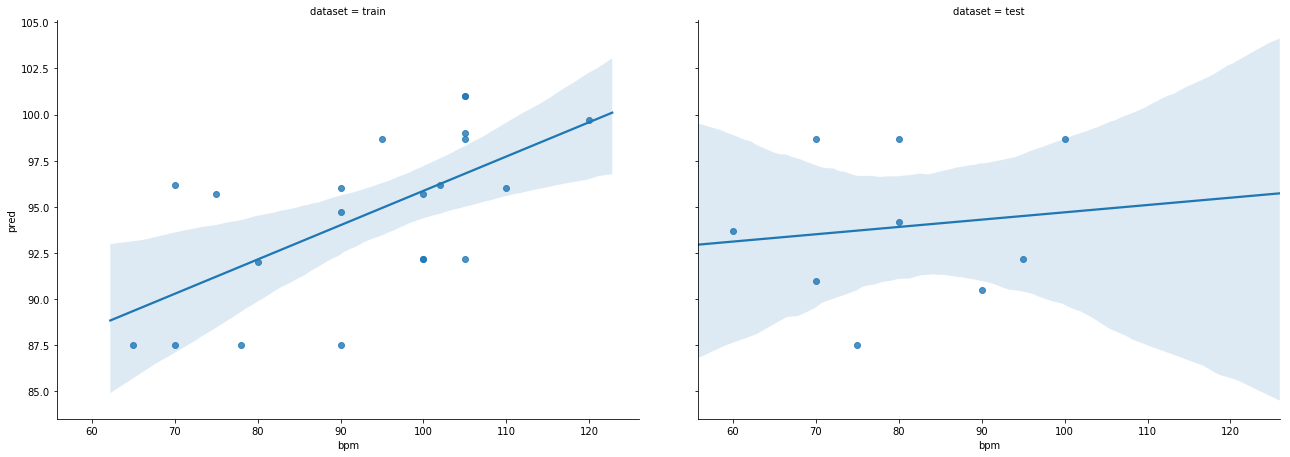

In [54]:
# Dataset scaled to max value, not including target value
norm = music.copy()
norm.loc[:, 'duration':'loudness'] = norm.loc[:, 'duration':'loudness'].apply(lambda x: x/x.max(), axis=0)
test = norm.sample(frac=0.3)
train = norm.loc[~norm.index.isin(test.index)]

# Build model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = train.loc[:, 'duration':'loudness']
y = train.bpm
knn.fit(X, y)

# Predicting held out data
Ytr_ = knn.predict(train.loc[:, 'duration':'loudness'])
Ytst_ = knn.predict(test.loc[:, 'duration':'loudness'])

print('Model R2, training: {0}'.format(round(r2(y, Ytr_), ndigits=3)))
print('Model R2, testing: {0}'.format(round(r2(test.bpm, Ytst_), ndigits=3)))

train.loc[:, 'pred'] = Ytr_
train.loc[:, 'dataset'] = 'train'
test.loc[:, 'pred'] = Ytst_
test.loc[:, 'dataset'] = 'test'

results = pd.DataFrame()
results = pd.concat([train.loc[:, ['bpm', 'pred', 'dataset']], test.loc[:, ['bpm', 'pred', 'dataset']]], axis=0)

g = sns.FacetGrid(results, col='dataset')
g.map(sns.regplot, 'bpm', 'pred')
f = plt.gcf()
f.set_size_inches(20, 8)
plt.show()

# Model 2: Reducing n to 4

Model R2, training: 0.313
Model R2, testing: 0.238


C:\Users\dmnb4898\miniconda3\envs\Env37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\dmnb4898\miniconda3\envs\Env37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


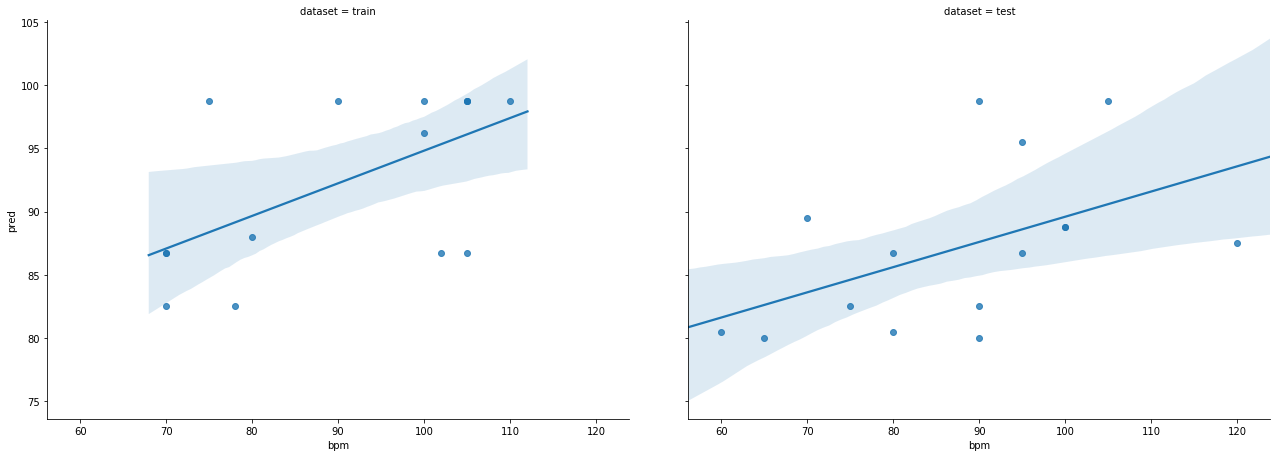

In [67]:
test = norm.sample(frac=0.5)
train = norm.loc[~norm.index.isin(test.index)]

# Build model
knn = neighbors.KNeighborsRegressor(n_neighbors=4)
X = train.loc[:, 'duration':'loudness']
y = train.bpm
knn.fit(X, y)

# Predicting held out data
Ytr_ = knn.predict(train.loc[:, 'duration':'loudness'])
Ytst_ = knn.predict(test.loc[:, 'duration':'loudness'])

print('Model R2, training: {0}'.format(round(r2(y, Ytr_), ndigits=3)))
print('Model R2, testing: {0}'.format(round(r2(test.bpm, Ytst_), ndigits=3)))

train.loc[:, 'pred'] = Ytr_
train.loc[:, 'dataset'] = 'train'
test.loc[:, 'pred'] = Ytst_
test.loc[:, 'dataset'] = 'test'

results = pd.DataFrame()
results = pd.concat([train.loc[:, ['bpm', 'pred', 'dataset']], test.loc[:, ['bpm', 'pred', 'dataset']]], axis=0)

g = sns.FacetGrid(results, col='dataset')
g.map(sns.regplot, 'bpm', 'pred')
f = plt.gcf()
f.set_size_inches(20, 8)
plt.show()

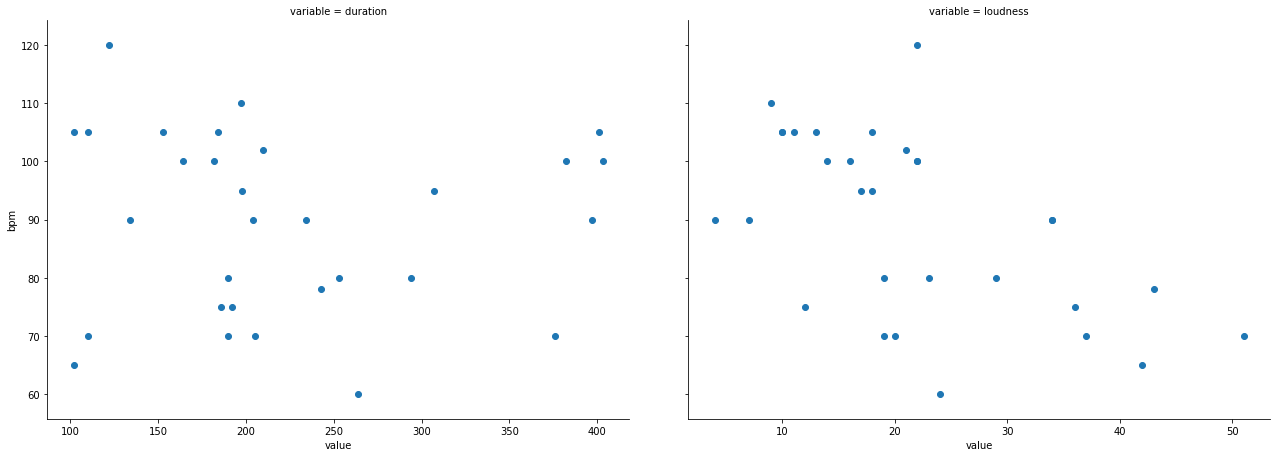

In [78]:
d = music.melt(id_vars='bpm')
g = sns.FacetGrid(d, col='variable', sharex=False)
g.map(plt.scatter, 'value', 'bpm')
f = plt.gcf()
f.set_size_inches(20, 8)

# Conclusion
I...didn't get great results. I also made a few mistakes, including scaling my data while training and testing datasets were still combined. Also, instead of truly cross validating I just ran my modelling code a few times and watched what happened to the training and testing R2.

That being said, the key thing I learned is that KNN probably has a tendency to overfit. My training R2 values fluctuated wildly, incidcating that individual quirks in each sample of data points had a large impact on the data. In the last few assignments when I was using OLS I didn't see the kind of variation in R2 that I saw here. Granted, I also had more data to work with, but OLS by definition estimates based on all data points available and is therefore more robust to noise and outliers than a method that chooses a value based on a few points.